#Long Form Question Answering &amp; Generated Content Detection

In this notebook, we are going to implement a long-form question answering and generated content detection model using natrual language processing (NLP) tools.

The dataset used in this project is a subset of [ELI5 dataset](https://huggingface.co/datasets/eli5_category).

The first step is to load the data and learn about the characteristics of data.
Then we have to do some pre-proceesing on the text data in order to make it ready to be given to a model to learn.

## install &amp; import libraries

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
from datasets import load_dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load dataset and do some tasks on it

In [3]:
dataset = load_dataset("eli5_category")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for eli5_category contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/eli5_category
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.war

Generating train split:   0%|          | 0/91772 [00:00<?, ? examples/s]

Generating validation1 split:   0%|          | 0/5446 [00:00<?, ? examples/s]

Generating validation2 split:   0%|          | 0/2375 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5411 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['q_id', 'title', 'selftext', 'category', 'subreddit', 'answers', 'title_urls', 'selftext_urls'],
        num_rows: 91772
    })
    validation1: Dataset({
        features: ['q_id', 'title', 'selftext', 'category', 'subreddit', 'answers', 'title_urls', 'selftext_urls'],
        num_rows: 5446
    })
    validation2: Dataset({
        features: ['q_id', 'title', 'selftext', 'category', 'subreddit', 'answers', 'title_urls', 'selftext_urls'],
        num_rows: 2375
    })
    test: Dataset({
        features: ['q_id', 'title', 'selftext', 'category', 'subreddit', 'answers', 'title_urls', 'selftext_urls'],
        num_rows: 5411
    })
})

In [4]:
dataset['train'][1000]

{'q_id': '5nzohm',
 'title': 'how HDD and flash drives store data without being connected to electricity .',
 'selftext': 'i always took it for granted but never knew how it works , can someone eli5 how the data is kept in harddisk drives ,etc... after its not connected to a power source ?',
 'category': 'Technology',
 'subreddit': 'explainlikeimfive',
 'answers': {'a_id': ['dcfgqwv'],
  'text': ["Differently. HDDs store data in the polarization of a thin magnetic media. The coding is along the lines of if NS then that's a 0 and SN is a 1. Flash storage uses electrons stored in a tiny capacitor. Lots of charge = 1 and no charge = 0."],
  'score': [3],
  'text_urls': [[]]},
 'title_urls': ['url'],
 'selftext_urls': ['url']}

There is no useful information for selftext_urls.

In [5]:
# Assuming dataset['train']['selftext_urls'] is your list
np.unique(dataset['train']['selftext_urls'])


array(['url'], dtype='<U3')

There is no useful information for title_urls.

In [6]:
# Assuming dataset['train']['selftext_urls'] is your list
np.unique(dataset['train']['title_urls'])


array(['url'], dtype='<U3')

There is no useful information about subreddit.

In [7]:
# Assuming dataset['train']['subreddit'] is your list
np.unique(dataset['train']['subreddit'])


array(['explainlikeimfive'], dtype='<U17')

**There are some useful informations in selftext feature.**

In [8]:
# Assuming dataset['train']['selftext'] is your list
np.unique(dataset['train']['selftext'])


array(['',
       '" will be available in global markets first, before coming to the US later this spring. " Doesn\'t "global" encompass every country? If so, why does it say Global release first followed by U.S?',
       '"1 second is the time that makes the unperturbed ground state hyperfine transition frequency to be 9192631770 when expressed in the unit Hz which is equal to s-1" I\'m tring to learn physics and came across this as I read the introductory chapter of a physics book. I do not understand this language. What is this even?',
       ..., '💩', '😡', '🤔'], dtype='<U4439')

In [9]:
dataset['train'][2]

{'q_id': '5lcl43',
 'title': 'Why do we fail to do realistic human CGI (like in SW Rouge One) yet we do it so great on non-human beings (like in Warcraft)?',
 'selftext': 'Title pretty much, thanks for answers in advance!',
 'category': 'Technology',
 'subreddit': 'explainlikeimfive',
 'answers': {'a_id': ['dbuns7l', 'dbunw2c', 'dbup34d', 'dbuo2f1'],
  'text': ["It's more that we're really good at picking up subtle mistakes in humans, and fantasy beasts have no reference, so its a lot harder for them to look wrong.",
   "Probably because we are so adapted to human skin/tone/etc. that our brains can pick out what is real and what is fake. Since we can't actually conceptualize what alien skin would be, real or fake is no different to us. Think about it like being scared as a child by a man dressed in a costume, over time we learn and accept that it is fake and not a threat (except clowns fuck that shit).",
   'When was the last time you compared an Orc IRL to WoW?',
   "It's a phenomenon

## EDA on data

lets now plot the diversity of different categories of teh dataset:

In [10]:
np.unique(dataset['train']['category'])

array(['Biology', 'Chemistry', 'Earth Science', 'Economics',
       'Mathematics', 'Other', 'Physics', 'Psychology', 'Technology'],
      dtype='<U13')

In [11]:
df = pd.DataFrame(dataset['train'])
df.head()

,q_id,title,selftext,category,subreddit,answers,title_urls,selftext_urls
0,5lchat,Why there was a 'leap second' added to the end...,,Other,explainlikeimfive,"{'a_id': ['dbuoyxl', 'dbur7gi', 'dbuotht'], 't...",[url],[url]
1,5lcjq6,How do you claim undiscovered land?,"If your on a boat, sailing through lets say th...",Other,explainlikeimfive,"{'a_id': ['dbuplm8', 'dbuocvb', 'dbux9vf'], 't...",[url],[url]
2,5lcl43,Why do we fail to do realistic human CGI (like...,"Title pretty much, thanks for answers in advance!",Technology,explainlikeimfive,"{'a_id': ['dbuns7l', 'dbunw2c', 'dbup34d', 'db...",[url],[url]
3,5lcr1h,Why is it that we calm down when we take a dee...,,Biology,explainlikeimfive,"{'a_id': ['dbuusst'], 'text': ['Anxiety/stress...",[url],[url]
4,5lcsyf,Why does 1080p on a 4k TV look better than 108...,,Technology,explainlikeimfive,"{'a_id': ['dbuq0qt', 'dbuqstj'], 'text': ['In ...",[url],[url]


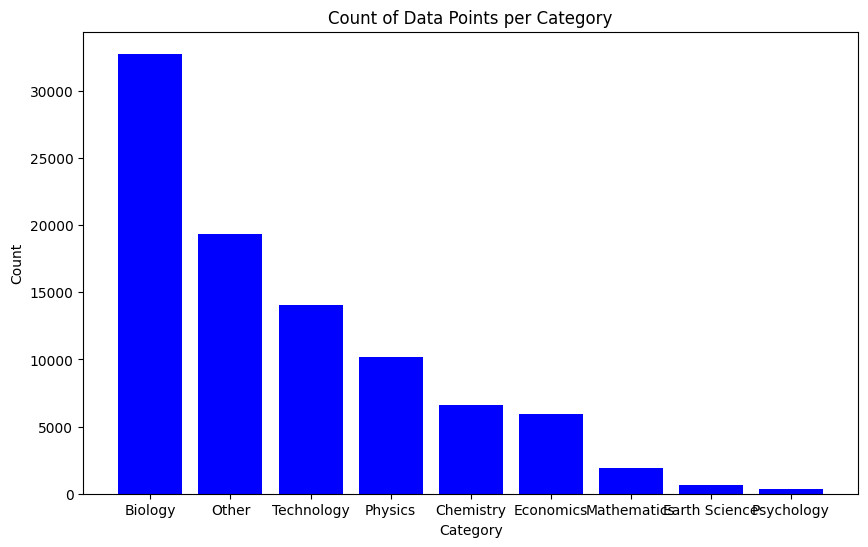

In [12]:
# Count the occurrences of each category
category_counts = df['category'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of your plot
plt.bar(category_counts.index, category_counts.values, color='blue')  # You can choose your own color
plt.xlabel('Category')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Count of Data Points per Category')  # Title of the plot
plt.show()

lets try to divide the dataset into different lists:

In [13]:
def organize_dataset(data):
  '''
    input: dataset must be given as dataset['train'] or dataset['test']
  '''

  # questions
  # questions_self_text
  # categories
  # answers
  # answers_scores

  questions = data['title']
  questions_selftext = data['selftext']
  categories = data['category']

  answers = []
  answers_scores = []
  for item in data:
    answers.append(item['answers']['text'])
    answers_scores.append(item['answers']['score'])

  dataset_dict = {"questions":questions, "selftext": questions_selftext, "category":categories, "answers":answers, "score":answers_scores}
  return dataset_dict

In [14]:
dataset_dict = organize_dataset(dataset['train'])

lets now plot the average length of sentences in each question and each answer:

In [ ]:
questions_words_count = []
for q in dataset_dict['questions']:
  questions_words_count.append(len(q.split()))

print(f'question {0}: {dataset_dict["questions"][0]}')

print(questions_words_count)
print(f'Average number of words per question: {np.mean(questions_words_count)}')

question 0: Why there was a 'leap second' added to the end of 2016?
[12, 6, 26, 21, 15, 18, 14, 8, 9, 24, 11, 13, 9, 20, 19, 6, 29, 8, 15, 10, 20, 8, 11, 33, 37, 11, 7, 10, 8, 4, 24, 15, 17, 4, 16, 14, 13, 38, 10, 15, 4, 7, 19, 30, 12, 3, 23, 37, 4, 11, 10, 4, 7, 18, 2, 20, 10, 19, 13, 24, 26, 11, 14, 7, 12, 18, 8, 9, 12, 24, 11, 8, 21, 14, 17, 21, 4, 26, 8, 8, 19, 17, 4, 17, 20, 21, 16, 6, 23, 10, 1, 13, 9, 8, 17, 13, 15, 14, 29, 47, 4, 14, 5, 15, 20, 13, 9, 9, 11, 29, 11, 11, 17, 9, 16, 45, 16, 33, 21, 8, 18, 39, 19, 7, 13, 12, 23, 8, 4, 17, 31, 13, 12, 6, 14, 16, 20, 18, 25, 15, 11, 14, 8, 15, 17, 31, 6, 14, 34, 11, 16, 12, 19, 47, 28, 11, 11, 44, 38, 13, 24, 17, 8, 15, 9, 11, 20, 12, 11, 23, 19, 5, 11, 15, 32, 10, 35, 29, 7, 4, 9, 7, 18, 23, 11, 23, 4, 14, 23, 26, 17, 15, 12, 15, 22, 12, 13, 17, 13, 23, 13, 14, 14, 10, 33, 16, 18, 10, 18, 12, 24, 9, 13, 18, 11, 8, 17, 7, 22, 18, 14, 16, 23, 20, 17, 23, 8, 18, 9, 6, 20, 16, 11, 18, 18, 18, 24, 7, 11, 8, 12, 9, 11, 6, 12, 24, 12, 12,

lets now check the number of answers per question:

In [ ]:
answers_counts = [len(ans) for ans in dataset_dict['answers']]
print(answers_counts)

print(f'Average number of asnwers per question: {np.mean(answers_counts)}')

[3, 3, 4, 1, 2, 1, 1, 13, 2, 4, 11, 3, 1, 14, 2, 8, 1, 2, 1, 1, 2, 1, 1, 3, 5, 3, 2, 1, 2, 2, 5, 8, 4, 3, 8, 1, 8, 4, 2, 2, 1, 2, 1, 8, 2, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 13, 1, 7, 1, 9, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 2, 1, 4, 4, 2, 1, 2, 1, 2, 1, 3, 2, 5, 4, 1, 4, 1, 3, 1, 6, 3, 1, 1, 1, 2, 1, 20, 1, 3, 3, 2, 1, 2, 1, 4, 3, 2, 2, 2, 2, 1, 2, 2, 2, 1, 8, 1, 1, 3, 2, 2, 8, 2, 2, 3, 1, 2, 1, 3, 3, 1, 1, 3, 2, 1, 4, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 10, 1, 3, 15, 2, 2, 2, 1, 2, 2, 2, 2, 4, 1, 2, 5, 1, 1, 3, 3, 5, 2, 3, 1, 2, 5, 3, 7, 2, 4, 2, 1, 1, 1, 4, 2, 1, 1, 1, 2, 1, 4, 5, 8, 5, 1, 1, 3, 3, 2, 1, 21, 2, 1, 1, 1, 1, 8, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 4, 1, 3, 1, 4, 1, 1, 2, 3, 6, 2, 2, 13, 3, 10, 2, 1, 6, 1, 1, 3, 4, 2, 2, 3, 1, 6, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 3, 3, 1, 2, 3, 2, 1, 3, 2, 1, 1, 1, 4, 2, 1, 2, 1, 2, 1, 7, 2, 1, 3, 1, 1, 2, 3, 1, 2, 1, 1, 3, 1, 8, 1, 5, 2, 1, 1, 2, 2, 1, 12, 1, 2, 3, 3, 1, 3, 2, 3, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 7, 1, 1, 1

Now lets check what is the average number of words per each answer in general.

In [ ]:
answers_words_count = []
for ans_list in dataset_dict['answers']:
  for ans in ans_list:
    answers_words_count.append(len(ans.split()))

print(f'answers of question {0}: {dataset_dict["answers"][0]}')

print(answers_words_count)
print(f'Average number of words per answers: {np.mean(answers_words_count)}')

answers of question 0: ['the rotation of the earth is not a constant. in fact the rotation of the earth is slowing down, which means that a full day is getting slightly longer. without leap seconds our clocks would slowly drift ever so slightly out of sync with the actual day. we could deal with this by redefining how how long 1 second is, making it slightly longer so that one day is still exactly 24*60*60 seconds. but in practice that is really inconvenient for a lot of our technology which relies on very precise timing. its easier to just move us ahead one second every couple of years or so.', "The Earth's rotation is not regular. It varies a bit, so sometimes we add a second. We do this to ensure that noon is always going to be sometime around mid-day. If we did not add leap seconds, over a very long period of time where the Earth's rotation slowly changed, noon could end up being at dusk. We want to keep 7am in the morning, noon at mid-day, 7pm around evening, etc. Though we have n

In [ ]:
dataset_dict['questions'][3]

'Why is it that we calm down when we take a deep breath, hold it for a few seconds and exhale?'

In [ ]:
print(dataset_dict['answers'][2][2])
print(len(dataset_dict['answers'][2][2].split()))

When was the last time you compared an Orc IRL to WoW?
12


Now lets check what is the average number of words per each answer for each category.

In [ ]:
answers_words_count_per_cat = {}
answers_words_count = []

for cat in np.unique(dataset_dict['category']):
  answers_words_count = []
  for item in dataset['train']:
    if item['category'] == cat:
      for ans in item['answers']['text']:
        answers_words_count.append(len(ans.split()))
  answers_words_count_per_cat[cat] = answers_words_count

In [ ]:
print(answers_words_count_per_cat.keys())

dict_keys(['Biology', 'Chemistry', 'Earth Science', 'Economics', 'Mathematics', 'Other', 'Physics', 'Psychology', 'Technology'])


In [ ]:
for cat in answers_words_count_per_cat.keys():
  print(f'Average word count for answers of category "{cat}": {np.mean(answers_words_count_per_cat[cat])}')

Average word count for answers of category "Biology": 97.72407500224904
Average word count for answers of category "Chemistry": 94.37178137935874
Average word count for answers of category "Earth Science": 97.95806639487478
Average word count for answers of category "Economics": 127.37866333095067
Average word count for answers of category "Mathematics": 146.7789142407553
Average word count for answers of category "Other": 103.48329185922503
Average word count for answers of category "Physics": 113.72060499780798
Average word count for answers of category "Psychology": 110.92045454545455
Average word count for answers of category "Technology": 121.40742260787992


### Stemming and Lemmatization

- Stemming reduces word-forms to stems in order to reduce size, whereas lemmatization reduces the word-forms to linguistically valid lemmas. For example, the stem of the word ‘happy’ is ‘happi’, but its lemma is ‘happy’, which is linguistically valid.

- Lemmatization is usually more sophisticated and requires some sort of lexica. Stemming, on the other hand, can be achieved with simple rule-based approaches.

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
# an instance of Word Net Lemmatizer
lemmatizer = WordNetLemmatizer()


for q in dataset_dict['questions'][0:5:2]:
  print(f'question: {q}')

  # tokenizer must be checked not only based on spaces
  words = q.split()
  print(f'tokens: {words}')

  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  print("The stemmed words: ", lemmatized_words)

  lemmatized_words_pos = [lemmatizer.lemmatize(word, pos = "a") for word in words]
  print("The lemmatized words using a POS tag: ", lemmatized_words_pos)

  print("~~~~~~~~~~~~~~~~~~~~~~~~~")

question: Why there was a 'leap second' added to the end of 2016?
tokens: ['Why', 'there', 'was', 'a', "'leap", "second'", 'added', 'to', 'the', 'end', 'of', '2016?']
The stemmed words:  ['Why', 'there', 'wa', 'a', "'leap", "second'", 'added', 'to', 'the', 'end', 'of', '2016?']
The lemmatized words using a POS tag:  ['Why', 'there', 'was', 'a', "'leap", "second'", 'added', 'to', 'the', 'end', 'of', '2016?']
~~~~~~~~~~~~~~~~~~~~~~~~~
question: Why do we fail to do realistic human CGI (like in SW Rouge One) yet we do it so great on non-human beings (like in Warcraft)?
tokens: ['Why', 'do', 'we', 'fail', 'to', 'do', 'realistic', 'human', 'CGI', '(like', 'in', 'SW', 'Rouge', 'One)', 'yet', 'we', 'do', 'it', 'so', 'great', 'on', 'non-human', 'beings', '(like', 'in', 'Warcraft)?']
The stemmed words:  ['Why', 'do', 'we', 'fail', 'to', 'do', 'realistic', 'human', 'CGI', '(like', 'in', 'SW', 'Rouge', 'One)', 'yet', 'we', 'do', 'it', 'so', 'great', 'on', 'non-human', 'being', '(like', 'in', 'War

### Part of Speech Tagging (POS Tagging)

As it is clear from the above code sections, for a correct lemmatization task, we need to detect the POS (part of speech) of each token of each question and answer.

Since for example word "leaves" could be transformed to eitehr "leaf" or "leave" based on its part of speech.

In [18]:
# Define a function to map NLTK to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'  # adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # verb
    elif treebank_tag.startswith('N'):
        return 'n'  # noun
    elif treebank_tag.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default to noun if not found


In [24]:
# Initializing the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

txt = "why are the leaves green?"

# sent_tokenize is one of instances of PunktSentenceTokenizer from the nltk.tokenize.punkt module
tokenized = sent_tokenize(txt)
for i in tokenized:

  # Word tokenizers is used to find the words and punctuation in a string
  wordsList = nltk.word_tokenize(i)

  # removing stop words from wordList
  # wordsList = [w for w in wordsList if not w in stop_words]

  #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.
  tagged = nltk.pos_tag(wordsList)

  # Lemmatize using the mapped POS tags
  lemmatized_words_pos = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged]

  print(tagged)
  print("The lemmatized words using a POS tag: ", lemmatized_words_pos)

[('why', 'WRB'), ('are', 'VBP'), ('the', 'DT'), ('leaves', 'NNS'), ('green', 'JJ'), ('?', '.')]
The lemmatized words using a POS tag:  ['why', 'be', 'the', 'leaf', 'green', '?']


In [58]:
# Lemmatize each token based on POS-tag
# We have to do this for all questions tokens
# So first we have to tokenize sentences

lemmatizer = WordNetLemmatizer()
lemmatized_questions_pos = []

for question in dataset_dict['questions']:
  # sent_tokenize is one of instances of PunktSentenceTokenizer from the nltk.tokenize.punkt module
  wordsList = nltk.word_tokenize(question)

  # removing stop words from wordList
  # wordsList = [w for w in wordsList if not w in stop_words]

  #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.
  tagged = nltk.pos_tag(wordsList)

  # Lemmatize using the mapped POS tags
  lemmatized_words_pos = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged]
  lemmatized_questions_pos.append(lemmatized_words_pos)


In [59]:
print(len(lemmatized_questions_pos))
print(len(dataset_dict['questions']))

91772
91772


In [60]:
# Lemmatize each token based on POS-tag
# We have to do this for all answers tokens
# So first we have to tokenize sentences

lemmatizer = WordNetLemmatizer()
lemmatized_answers_pos = []

for ans_list in dataset_dict['answers']:
  lemmatized_ans_list_pos = []
  for ans in ans_list:

    # sent_tokenize is one of instances of PunktSentenceTokenizer from the nltk.tokenize.punkt module
    wordsList = nltk.word_tokenize(question)

    # removing stop words from wordList
    # wordsList = [w for w in wordsList if not w in stop_words]

    #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)

    # Lemmatize using the mapped POS tags
    lemmatized_words_pos = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged]
    lemmatized_ans_list_pos.append(lemmatized_words_pos)

  lemmatized_answers_pos.append(lemmatized_ans_list_pos)

In [61]:
print(len(dataset_dict['answers']))

print(len(lemmatized_answers_pos))

91772
91772


Now lets check how this lemmatizer treats emoticons or other languages in the dataset.

It wont change neither the emoticons nor other languages written like Chinese or Korean, So that's OK!

In [86]:
for i , s in enumerate(dataset_dict['questions']):
  if s.find('Korean') != -1:
    print(i, s)

29 How to type Korean?
1991 How is being dyslexic in symbol languages (Chinese, Japanese, Korean) different from being dyslexic in English?
4732 Why does US restrain from shooting down N.Korean missiles?
14442 Why do Japanese and Korean manufacturers seem to make such a wide variety of products from a given company?
16330 Why are white people called "white people" when many Asians (mainly Korean, Japanese and Chinese) have pretty much the same skin color?
20762 Why do we focus more on the Vietnam war and less on the Korean war?
25494 Why can foreign car companies like Honda (Japanese), Volkswagen (German), and Hyundai (South Korean) make successful sedan-type cars in the United States, but domestic companies GM and Ford struggle to make good-selling sedans.
28889 Why are there so many movies made about the Vietnam war but so few about the Korean War?
29568 Steel is a very heavy product to ship, so how are the Chinese & Korean steel manufactures able to sell steel cheaper in the USA tha

In [87]:
dataset_dict['answers'][29]

['Korean uses an alphabet called hangul. Individual letters are composed into syllables, with each syllable occupying one block. This means that the computer needs to know when you have finished typing one syllable and want to start typing the next: fortunately, the Korean writing system has very strict and simple rules that are quite easy to program into a computer. A syllable must start with a consonant, and must contain at least one vowel; it can then have another consonant at the end. The consonant letter "ㅇ" is "ng" at the end of a syllable, but silent at the beginning of a syllable, so this lets you write syllables beginning with a vowel *sound* without breaking the rule that in written Korean, all syllables must begin with a consonant. In your example, "saranghae" is "사랑해", the three blocks representing the syllables "sa-rang-hae". First, you type an "s", which in Korean is "ㅅ". Next comes a vowel, "ㅏ"; when you type that, the "ㅅ" changes to "사", the syllable "sa". That\'s fine,

In [62]:
selftext = dataset_dict['selftext'][34]
wordsList1 = []
tagged1 = []

# Word tokenizers is used to find the words and punctuation in a string
wordsList1 = nltk.word_tokenize(selftext)

# removing stop words from wordList
# wordsList = [w for w in wordsList if not w in stop_words]

#  Using a Tagger. Which is part-of-speech tagger or POS-tagger.
tagged1 = nltk.pos_tag(wordsList1)

# Lemmatize using the mapped POS tags
lemmatized_words_pos = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged1]

print(selftext)
print("~~~~~~~~~~~~~~")
print(lemmatized_words_pos)

I know it seems irrational, but Felix Baumgartner! Thanks 😊 EDIT: Thanks everyone for all your replies :). Loving reading them! Just like to add, I know this can't happen without special clothing etc., like what Baumgartner wore, or being in a pressurised compartment such as a cockpit. I'm just wondering, theoretically ;). Thanks again :).
~~~~~~~~~~~~~~
['I', 'know', 'it', 'seem', 'irrational', ',', 'but', 'Felix', 'Baumgartner', '!', 'Thanks', '😊', 'EDIT', ':', 'Thanks', 'everyone', 'for', 'all', 'your', 'reply', ':', ')', '.', 'Loving', 'read', 'them', '!', 'Just', 'like', 'to', 'add', ',', 'I', 'know', 'this', 'ca', "n't", 'happen', 'without', 'special', 'clothing', 'etc.', ',', 'like', 'what', 'Baumgartner', 'wear', ',', 'or', 'be', 'in', 'a', 'pressurised', 'compartment', 'such', 'a', 'a', 'cockpit', '.', 'I', "'m", 'just', 'wondering', ',', 'theoretically', ';', ')', '.', 'Thanks', 'again', ':', ')', '.']


In [89]:
selftext = dataset_dict['answers'][29][0]
wordsList1 = []
tagged1 = []

# Word tokenizers is used to find the words and punctuation in a string
wordsList1 = nltk.word_tokenize(selftext)

# removing stop words from wordList
# wordsList = [w for w in wordsList if not w in stop_words]

#  Using a Tagger. Which is part-of-speech tagger or POS-tagger.
tagged1 = nltk.pos_tag(wordsList1)

# Lemmatize using the mapped POS tags
lemmatized_words_pos = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged1]

print(selftext)
print("~~~~~~~~~~~~~~")
print(lemmatized_words_pos)

Korean uses an alphabet called hangul. Individual letters are composed into syllables, with each syllable occupying one block. This means that the computer needs to know when you have finished typing one syllable and want to start typing the next: fortunately, the Korean writing system has very strict and simple rules that are quite easy to program into a computer. A syllable must start with a consonant, and must contain at least one vowel; it can then have another consonant at the end. The consonant letter "ㅇ" is "ng" at the end of a syllable, but silent at the beginning of a syllable, so this lets you write syllables beginning with a vowel *sound* without breaking the rule that in written Korean, all syllables must begin with a consonant. In your example, "saranghae" is "사랑해", the three blocks representing the syllables "sa-rang-hae". First, you type an "s", which in Korean is "ㅅ". Next comes a vowel, "ㅏ"; when you type that, the "ㅅ" changes to "사", the syllable "sa". That's fine, bu

Store dataset in file

In [ ]:
# import os
# import json
# from datasets import load_dataset

# # Load the dataset
# dataset = load_dataset("eli5_category")

# # Directory where you want to save the JSON files
# output_dir = "dataset_json_files"

# # Create the directory if it doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# # Iterate over each row in the dataset
# for i, example in enumerate(dataset["test"]):  # Change "train" to "validation" or "test" if needed
#     # Create a filename for the JSON file
#     filename = os.path.join(output_dir, f"example_{i}.json")

#     # Write the example as JSON to the file
#     with open(filename, "w") as f:
#         json.dump(example, f, indent=4)

#     print(f"Saved example {i} to {filename}")


Sample for Text to Speech

In [ ]:

# !pip install gTTS

# # Import the required module for text
# # to speech conversion
# from gtts import gTTS

# # This module is imported so that we can
# # play the converted audio
# import os

# # The text that you want to convert to audio
# mytext = 'Welcome to geeksforgeeks!'

# # Language in which you want to convert
# language = 'en'

# # Passing the text and language to the engine,
# # here we have marked slow=False. Which tells
# # the module that the converted audio should
# # have a high speed
# myobj = gTTS(text=mytext, lang=language, slow=False)

# # Saving the converted audio in a mp3 file named
# # welcome
# myobj.save("welcome.mp3")

# # Playing the converted file
# os.system("start welcome.mp3")


32512